In [36]:
import numpy as np
import pandas as pd
import os

import tensorflow as tf

## Read data

In [15]:
data = pd.read_csv("data.csv")
data.head()

,Unnamed: 0,idx,balancing
0,0,0,1.50
1,1,1,2.00
2,2,2,1.25
3,3,3,2.00
4,4,4,2.00


<AxesSubplot:>

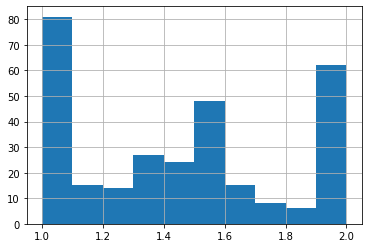

In [16]:
data["balancing"].hist()

In [22]:
data[data["balancing"] == 1.5].count()

Unnamed: 0    39
idx           39
balancing     39
dtype: int64

In [30]:
data["balancing1"] = data["balancing"] - 1

In [93]:
path_maps = "gen_maps"
SIZE = 8
BORDER = 6
X = []
for folder in os.listdir(path_maps):
    m = np.load(os.path.join(path_maps, folder, "map.npy"))
    b = BORDER + 1
    s = b+SIZE - 2
    m = (m[b:s, b:s] -1) / 10
    X.append(m)

In [94]:
X[15]

array([[0.1, 0.1, 0.8, 0.4, 0.4, 0.8],
       [0.4, 0. , 0.3, 0.1, 0.6, 0.1],
       [0.4, 0.1, 0.8, 0.1, 0.4, 0.8],
       [0.1, 0.8, 0.1, 0.3, 0.8, 0.1],
       [0.3, 0.1, 0.1, 0.1, 0. , 0.1],
       [0.1, 0.4, 0. , 0.4, 0.4, 0.1]])

In [13]:
m[7:13, 7:13].shape

(6, 6)

## Training

In [241]:
y = tf.convert_to_tensor(data["balancing1"])
X = tf.convert_to_tensor(X)
X = tf.expand_dims(X, axis=1)

In [96]:
y_train = y[:230]
y_test = y[230:]
X_train = X[:230]
X_test = X[230:]

In [242]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Input((6,6)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model.build()
model.compile(loss="mse", optimizer="adam")
model.summary()
model.fit(x=X_train, y=y_train, epochs=100)

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_178 (Dense)           (None, 6, 16)             112       
                                                                 
 flatten_13 (Flatten)        (None, 96)                0         
                                                                 
 dense_179 (Dense)           (None, 16)                1552      
                                                                 
 dense_180 (Dense)           (None, 1)                 17        
                                                                 
Total params: 1,681
Trainable params: 1,681
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
8/8 [==============================] - 1s 2ms/step - loss: 0.1370
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 0.1344
Epoch 3/100
8/8 [==========

8/8 [==============================] - 0s 2ms/step - loss: 0.0608
Epoch 93/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0601
Epoch 94/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0593
Epoch 95/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0583
Epoch 96/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0579
Epoch 97/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0570
Epoch 98/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0562
Epoch 99/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0556
Epoch 100/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0551


In [239]:
X.shape

TensorShape([300, 6, 6])

In [248]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input((6,6, 1)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
#model.add(tf.keras.layers.MaxPooling2D((2, 2)))
#model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dense(32, activation='relu'))
#model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model.build()
model.compile(loss="mse", optimizer="adam")
model.summary()
model.fit(x=X_train, y=y_train, epochs=100)

ValueError: Exception encountered when calling layer "conv2d_25" (type Conv2D).

Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_25/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_25/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,32], [3,3,32,32].

Call arguments received by layer "conv2d_25" (type Conv2D):
  • inputs=tf.Tensor(shape=(None, 2, 2, 32), dtype=float32)

In [230]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.1468


0.14678235352039337

3/3 [==============================] - 0s 2ms/step


<AxesSubplot:ylabel='Frequency'>

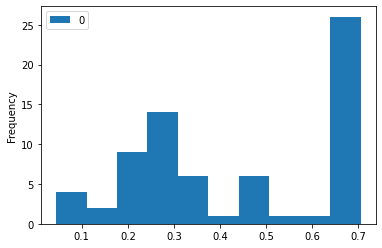

In [231]:
pd.DataFrame(abs(model.predict(X_test) - y_test)[0]).plot.hist()

In [238]:
i = 5
print(model.predict(tf.expand_dims(X_test[i], axis=0))[0][0])
print(y_test[i])

1/1 [==============================] - 0s 19ms/step
0.25906664
tf.Tensor(0.050000000000000044, shape=(), dtype=float64)


In [203]:
y_test[0]

<tf.Tensor: shape=(), dtype=float64, numpy=0.3999999999999999>

In [200]:
tf.expand_dims(X_test[0], axis=1)

<tf.Tensor: shape=(6, 1, 6), dtype=float64, numpy=
array([[[0.1, 0.4, 0.1, 0.1, 0.6, 0.4]],

       [[0.3, 0.1, 0.1, 0.8, 0.8, 0.1]],

       [[0.8, 0.4, 0.3, 0.3, 0.4, 0. ]],

       [[0.1, 0.3, 1. , 0.8, 0.1, 0.1]],

       [[0. , 0.4, 0.8, 0.8, 0.4, 0. ]],

       [[0.3, 0.6, 0.1, 0.1, 0.1, 0.1]]])>